In [10]:
from datasets import load_dataset, Dataset, DatasetDict
from datasets import ClassLabel, Features, Image
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import shutil



In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [5]:
pip install datasets[vision]

In [6]:
! pip install huggingface_hub

In [7]:
!apt-get install -y libheif-dev
!pip install pillow pyheif


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libheif-dev is already the newest version (1.12.0-2build1).
libheif-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 16.2 MB/s eta 0:00:00


In [8]:
from huggingface_hub import login

login()

In [9]:
from datasets import load_dataset, Dataset, Value, ClassLabel, Features

In [ ]:
dataset = load_dataset("imagefolder",data_dir="/content/drive/MyDrive/Ariolfo/cacao_dataset/all_new_data", drop_labels=True)

Resolving data files:   0%|          | 0/2306 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# Path to the dataset directory (where your class folders are located)
data_dir = "/content/drive/MyDrive/Ariolfo/cacao_dataset/all_new_data"

# List all class folders (which represent the class labels)
class_names = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Create a mapping from class name to label index
class_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}


In [ ]:
# Count the number of samples per class
class_counts = []
for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    # List all files in the class directory
    # You might want to filter by specific file extensions if necessary
    num_samples = len([file for file in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, file))])
    class_counts.append(num_samples)

           Class  Count
0     fermentado   1914
1          hongo     29
2        insecto      3
3  insufi_fermen    234
4      pizarroso     14
5        violeta    112


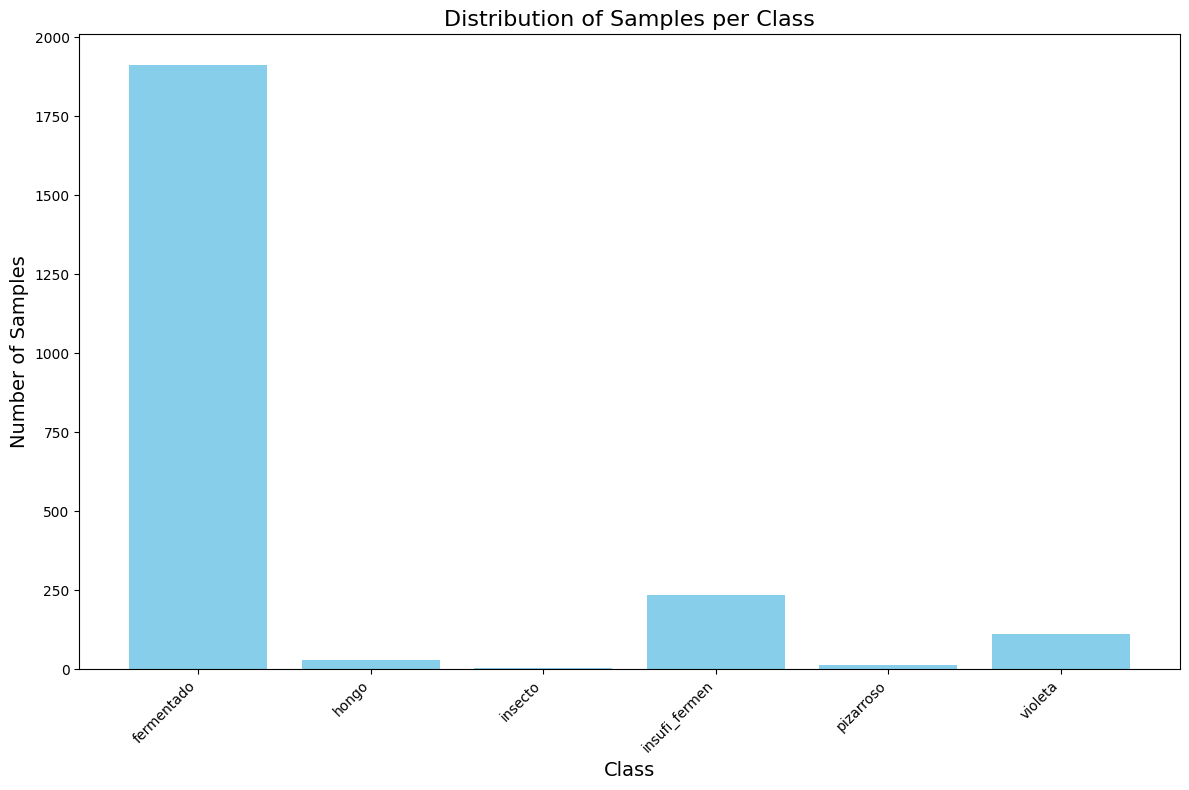

In [ ]:
df = pd.DataFrame({
    'Class': class_names,
    'Count': class_counts
})

# Display the counts (optional)
print(df)

# Plotting the distribution using Matplotlib
plt.figure(figsize=(12, 8))
plt.bar(df['Class'], df['Count'], color='skyblue')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Distribution of Samples per Class', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Set random seed for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Define paths
data_dir = "/content/drive/MyDrive/Ariolfo/cacao_dataset/dataset"
train_dir = "/content/drive/MyDrive/Ariolfo/cacao_dataset/train"
test_dir = "/content/drive/MyDrive/Ariolfo/cacao_dataset/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List all class folders
class_names = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

print(f"Found {len(class_names)} classes.")


Found 6 classes.


In [ ]:
for class_name in class_names:
    print(f"\nProcessing class: {class_name}")

    # Paths for the current class
    class_path = os.path.join(data_dir, class_name)
    train_class_path = os.path.join(train_dir, class_name)
    test_class_path = os.path.join(test_dir, class_name)

    # Create class subdirectories in train and test directories
    os.makedirs(train_class_path, exist_ok=True)
    os.makedirs(test_class_path, exist_ok=True)

    # List all files in the class directory
    all_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Shuffle the files
    random.shuffle(all_files)

    # Calculate split index
    split_index = int(0.8 * len(all_files))

    # Split into train and test
    train_files = all_files[:split_index]
    test_files = all_files[split_index:]

    print(f"Total samples: {len(all_files)}")
    print(f"Training samples: {len(train_files)}")
    print(f"Testing samples: {len(test_files)}")

    # Copy files to train directory
    for file_name in train_files:
        src_file = os.path.join(class_path, file_name)
        dst_file = os.path.join(train_class_path, file_name)
        shutil.copy2(src_file, dst_file)  # copy2 preserves metadata

    # Copy files to test directory
    for file_name in test_files:
        src_file = os.path.join(class_path, file_name)
        dst_file = os.path.join(test_class_path, file_name)
        shutil.copy2(src_file, dst_file)

print("\nTrain-test split completed successfully!")


Processing class: insufi_fermen
Total samples: 234
Training samples: 187
Testing samples: 47

Processing class: violeta
Total samples: 112
Training samples: 89
Testing samples: 23

Processing class: hongo
Total samples: 29
Training samples: 23
Testing samples: 6

Processing class: pizarroso
Total samples: 14
Training samples: 11
Testing samples: 3

Processing class: fermentado
Total samples: 1914
Training samples: 1531
Testing samples: 383

Processing class: insecto
Total samples: 3
Training samples: 2
Testing samples: 1

Train-test split completed successfully!


Found 6 classes in the training dataset.
Class 'fermentado': 1531 samples
Class 'hongo': 23 samples
Class 'insecto': 2 samples
Class 'insufi_fermen': 187 samples
Class 'pizarroso': 11 samples
Class 'violeta': 89 samples

Class Distribution in Training Set:
           Class  Count
0     fermentado   1531
1          hongo     23
2        insecto      2
3  insufi_fermen    187
4      pizarroso     11
5        violeta     89


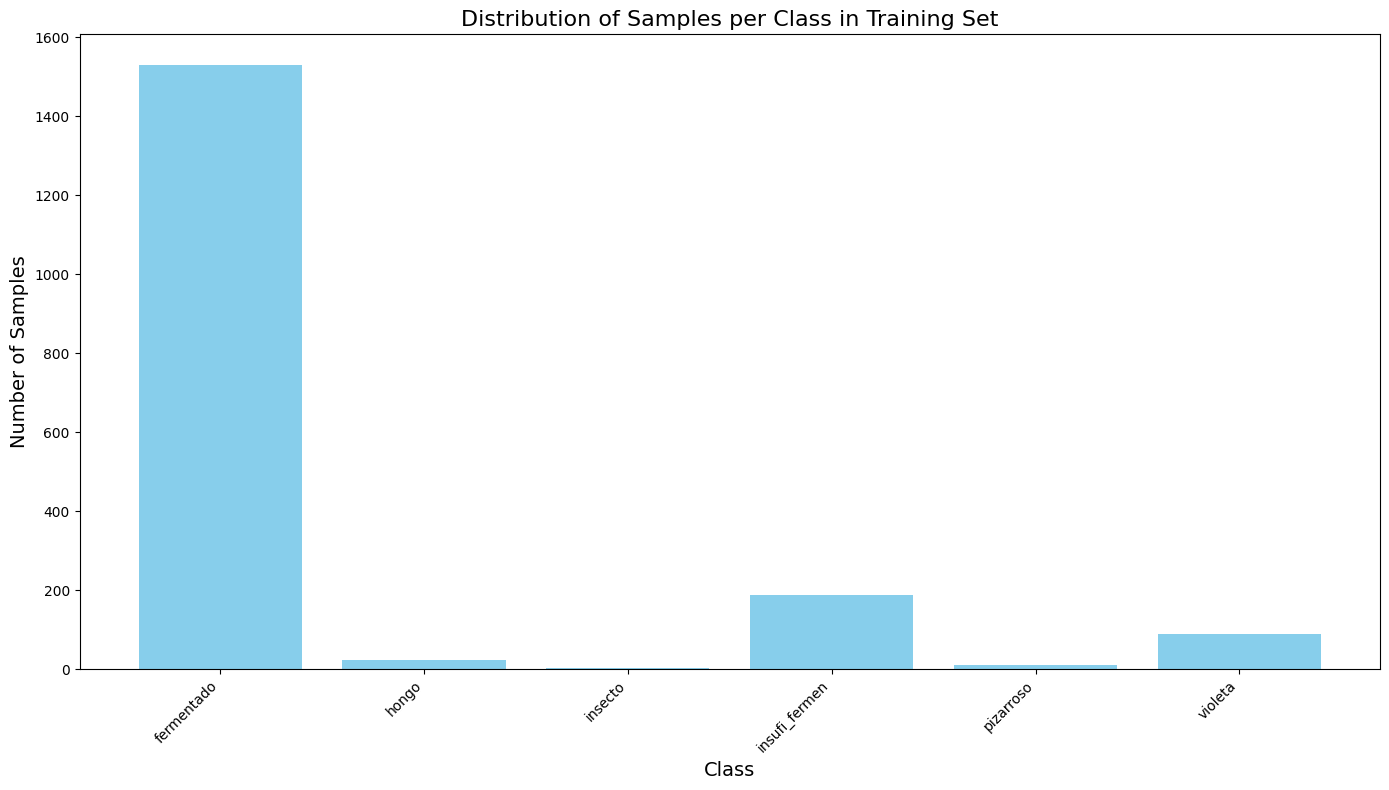

In [ ]:
# Path to the training dataset directory
train_dir = "/content/drive/MyDrive/Ariolfo/cacao_dataset/train"

# Verify that the training directory exists
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"The training directory {train_dir} does not exist.")

# List all class folders in the training directory
class_names = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]
class_names.sort()  # Sort class names alphabetically

print(f"Found {len(class_names)} classes in the training dataset.")

# Initialize a list to store counts
class_counts = []

# Define valid file extensions (modify as needed)
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

# Iterate through each class and count the number of samples
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    # List all files with valid extensions
    files = [f for f in os.listdir(class_path)
             if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(valid_extensions)]
    num_samples = len(files)
    class_counts.append(num_samples)
    print(f"Class '{class_name}': {num_samples} samples")

# Create a DataFrame for plotting
df_train = pd.DataFrame({
    'Class': class_names,
    'Count': class_counts
})

# Optional: Display the DataFrame
print("\nClass Distribution in Training Set:")
print(df_train)

# Plotting with Matplotlib
plt.figure(figsize=(14, 8))
plt.bar(df_train['Class'], df_train['Count'], color='skyblue')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Distribution of Samples per Class in Training Set', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Found 6 classes in the testing dataset.
Class 'fermentado': 383 samples
Class 'hongo': 6 samples
Class 'insecto': 1 samples
Class 'insufi_fermen': 47 samples
Class 'pizarroso': 3 samples
Class 'violeta': 23 samples

Class Distribution in Testing Set:
           Class  Count
0     fermentado    383
1          hongo      6
2        insecto      1
3  insufi_fermen     47
4      pizarroso      3
5        violeta     23


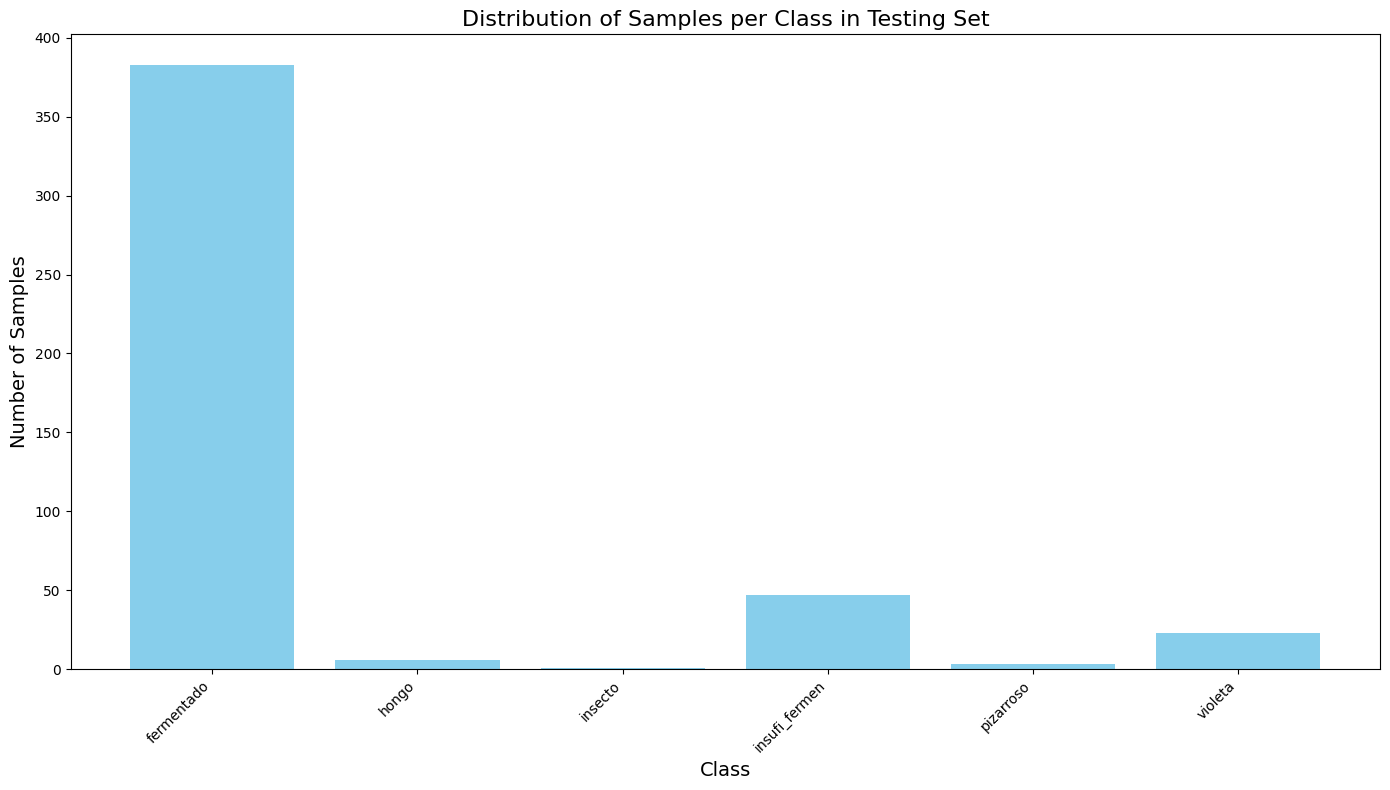

In [ ]:
# Path to the testing dataset directory
test_dir = "/content/drive/MyDrive/Ariolfo/cacao_dataset/test"

# Verify that the testing directory exists
if not os.path.exists(test_dir):
    raise FileNotFoundError(f"The training directory {test_dir} does not exist.")

# List all class folders in the testing directory
class_names = [folder for folder in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, folder))]
class_names.sort()  # Sort class names alphabetically

print(f"Found {len(class_names)} classes in the testing dataset.")

# Initialize a list to store counts
class_counts = []

# Define valid file extensions (modify as needed)
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

# Iterate through each class and count the number of samples
for class_name in class_names:
    class_path = os.path.join(test_dir, class_name)
    # List all files with valid extensions
    files = [f for f in os.listdir(class_path)
             if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(valid_extensions)]
    num_samples = len(files)
    class_counts.append(num_samples)
    print(f"Class '{class_name}': {num_samples} samples")

# Create a DataFrame for plotting
df_test = pd.DataFrame({
    'Class': class_names,
    'Count': class_counts
})

# Optional: Display the DataFrame
print("\nClass Distribution in Testing Set:")
print(df_test)

# Plotting with Matplotlib
plt.figure(figsize=(14, 8))
plt.bar(df_test['Class'], df_test['Count'], color='skyblue')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Distribution of Samples per Class in Testing Set', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
dataset = load_dataset("imagefolder",data_dir="/content/drive/MyDrive/Ariolfo/cacao_dataset/dataset", drop_labels=True)

Resolving data files:   0%|          | 0/1843 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/463 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [12]:
# Path to the dataset directory (where your class folders are located)
data_dir = "/content/drive/MyDrive/Ariolfo/cacao_dataset/dataset"

# List all class folders (which represent the class labels)
class_names = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Create a mapping from class name to label index
class_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}


In [17]:
from datasets import load_dataset

# Define the path to your dataset directory
data_dir = "/content/drive/MyDrive/Ariolfo/cacao_dataset/dataset"

# Load the dataset using the 'imagefolder' script
dataset = load_dataset("imagefolder", data_dir=data_dir, split={"train": "train", "test": "test"})

# Access train and test datasets
train_dataset = dataset["train"]
test_dataset = dataset["test"]

# Example: Print the first example from the train dataset
print(train_dataset[0])


Resolving data files:   0%|          | 0/1843 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/463 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=430x238 at 0x7CAE70C40AC0>, 'label': 0}


In [16]:
len(class_to_label)

2

In [18]:
dataset.push_to_hub("SemilleroCV/Cocoa-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1843 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/19 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/463 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/496 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/SemilleroCV/Cocoa-dataset/commit/e76f7b279cb98e25a7ac5546dad16c5af8232767', commit_message='Upload dataset', commit_description='', oid='e76f7b279cb98e25a7ac5546dad16c5af8232767', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/SemilleroCV/Cocoa-dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='SemilleroCV/Cocoa-dataset'), pr_revision=None, pr_num=None)